In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# define the path to the CSV file on your Desktop
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "dataset.csv")

# check if the file exists at the specified path
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at {file_path}. Please ensure 'dataset.csv' is located on your Desktop.")

# load the dataset
data = pd.read_csv(file_path)


## Before anything lets do some datacleaning

In [17]:
# Check for missing values in each column
missing_values = data.isnull().sum()
unclean_data = missing_values[missing_values > 0]

if not unclean_data.empty:
    print("Columns with missing values:")
    print(unclean_data)
else:
    print("No missing values found.")

# Additional check for any non-numeric or unexpected data types
print("\nData types of each column:")
print(data.dtypes)

# Display any rows with NaN or null values (if applicable)
print("\nRows with any missing values:")
print(data[data.isnull().any(axis=1)])


No missing values found.

Data types of each column:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder 

## It looks like our data is clean!

## Now that we have uploaded the data from our Desktop, we can look at some statistics and explore the features available.

### Please adjust the code above to fit your OS and the location where your CSV data is stored.

For reference, I am running macOS and have the CSV on my Desktop.

You can download the data [here](https://www.kaggle.com/datasets/rkiattisak/graduation-rate?resource=download).


In [18]:
print("Data Overview:\n", data.info())

print("\nSummary Statistics:\n", data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

## We can now look at some distributions so we can get a better feel of our data

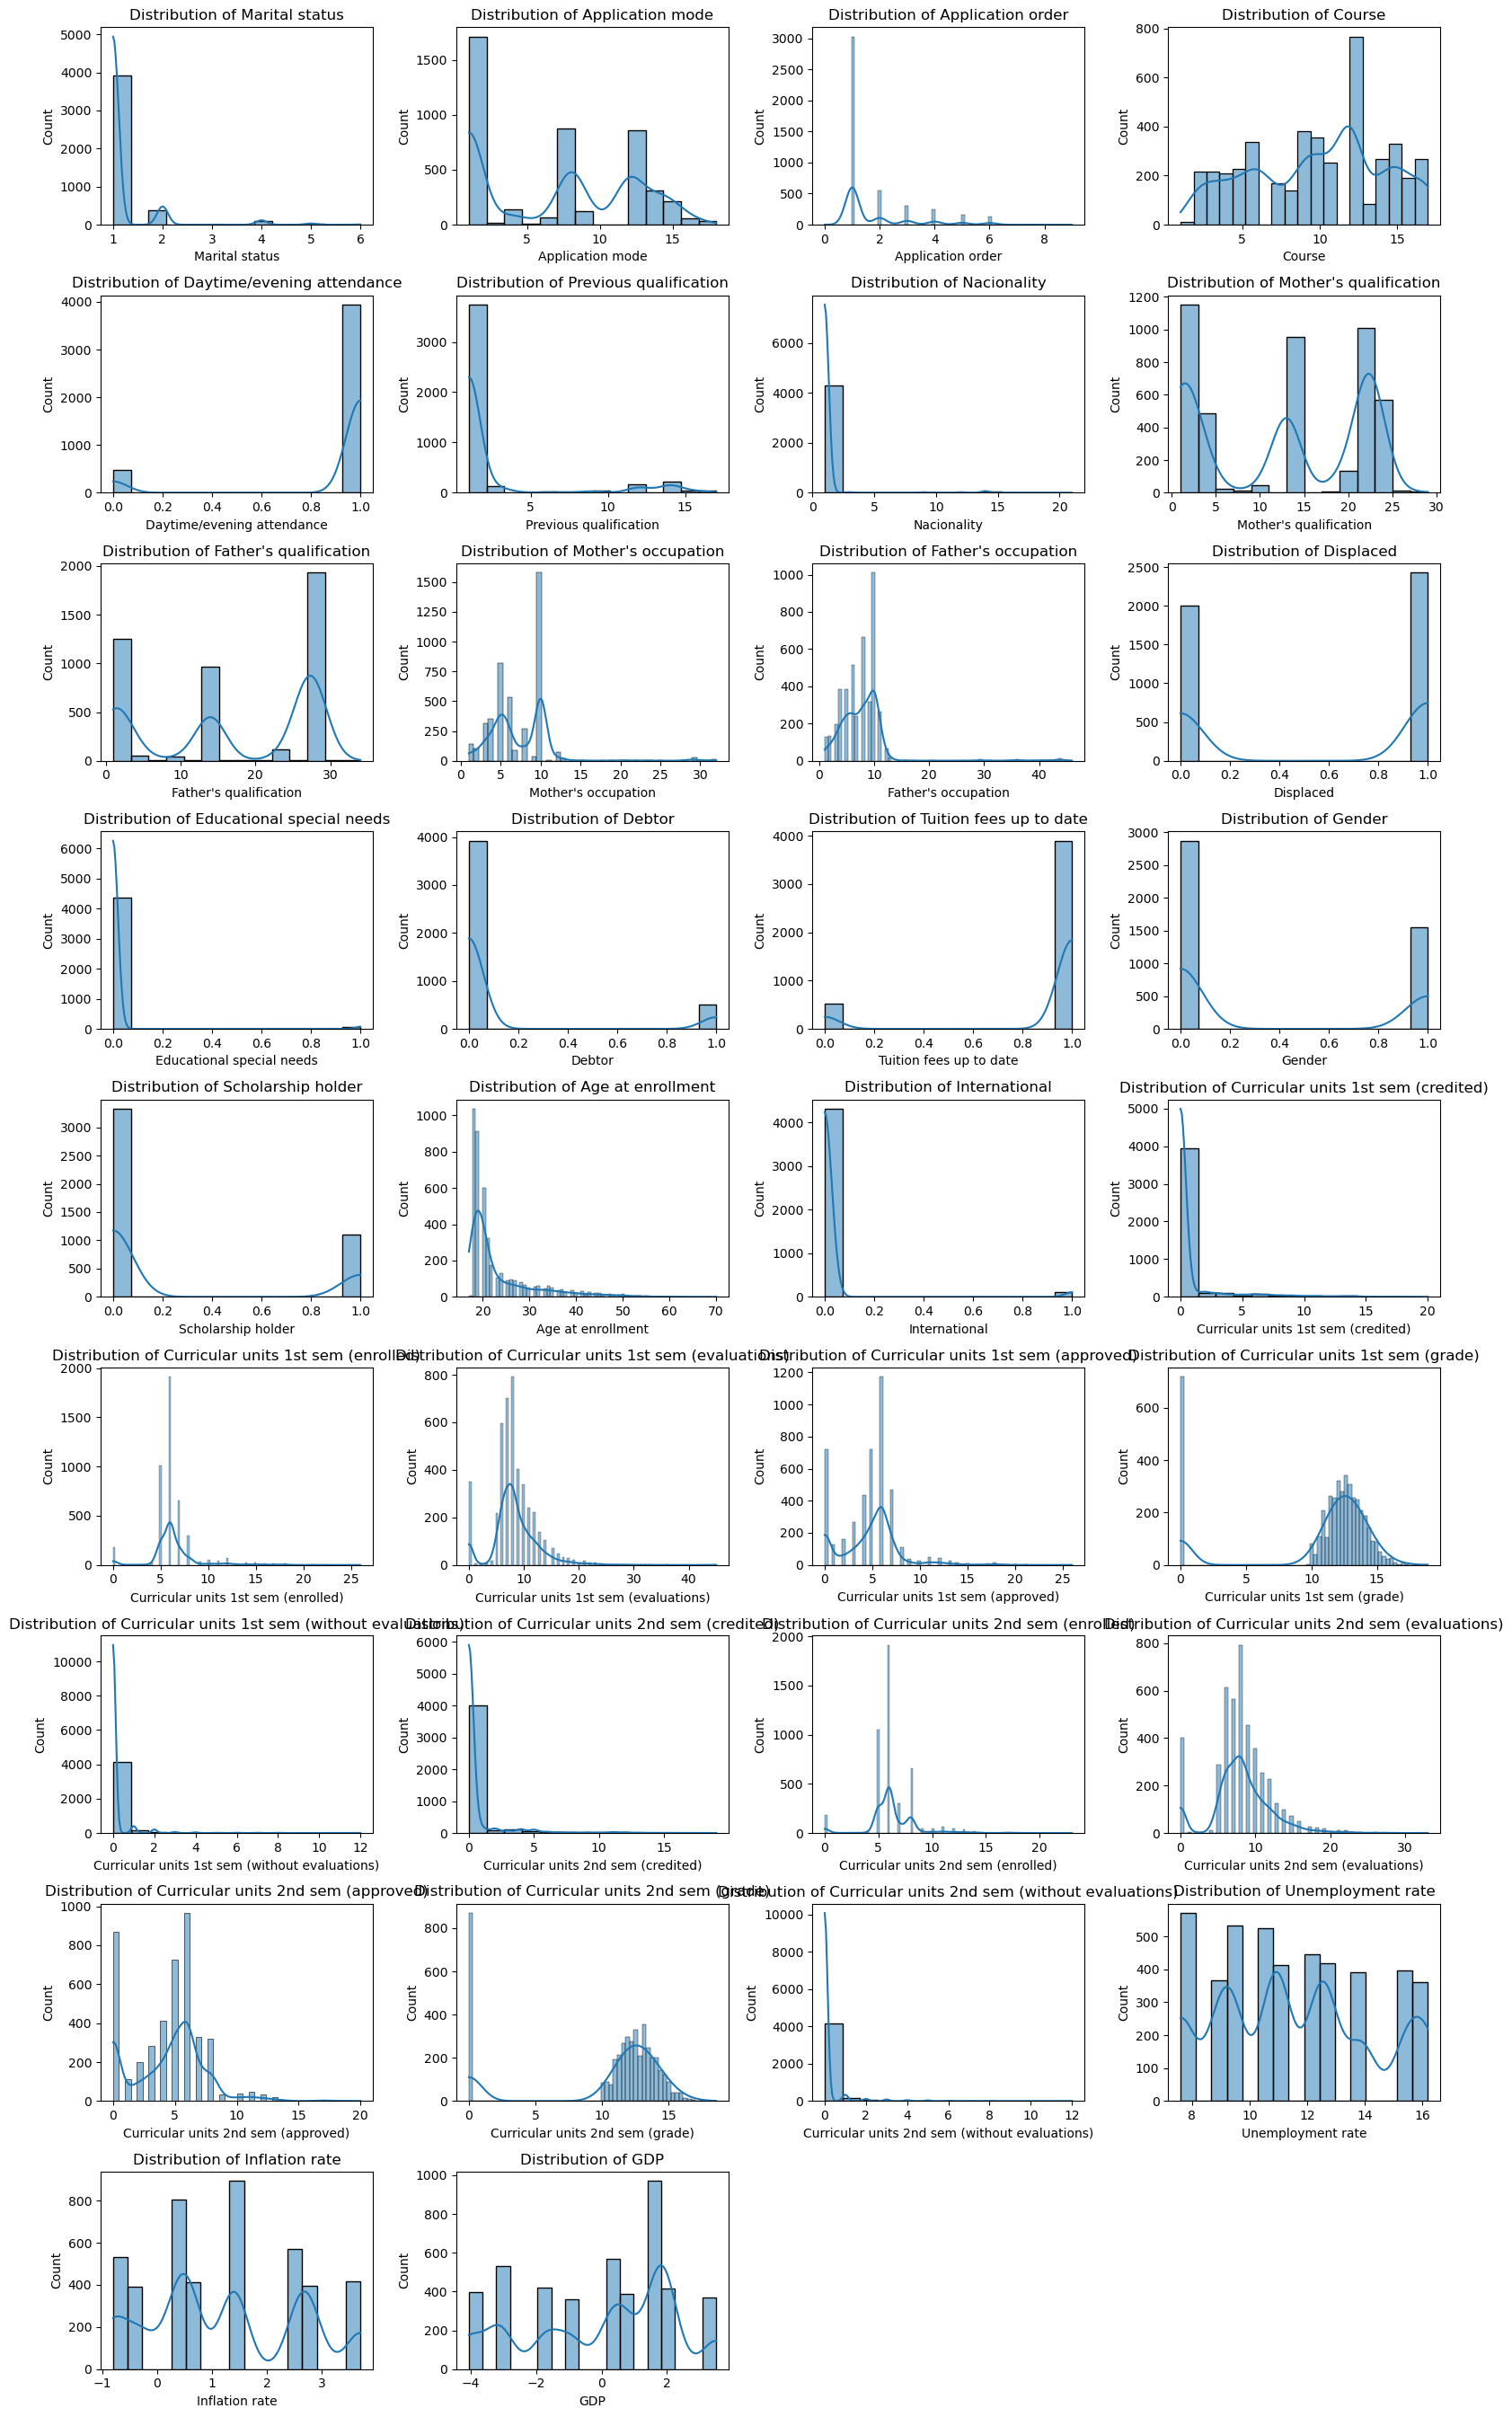

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# distribution of Numeric Variables
numeric_columns = data.select_dtypes(include=['number']).columns

# determine grid size based on number of numeric columns
n_cols = 4  
n_rows = math.ceil(len(numeric_columns) / n_cols) 

plt.figure(figsize=(n_cols * 4, n_rows * 3))

# loop through each numeric column to create individual histograms
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()  # adjusting layout to prevent overlap
plt.show()


## We will now make some boxplots for even more visuals


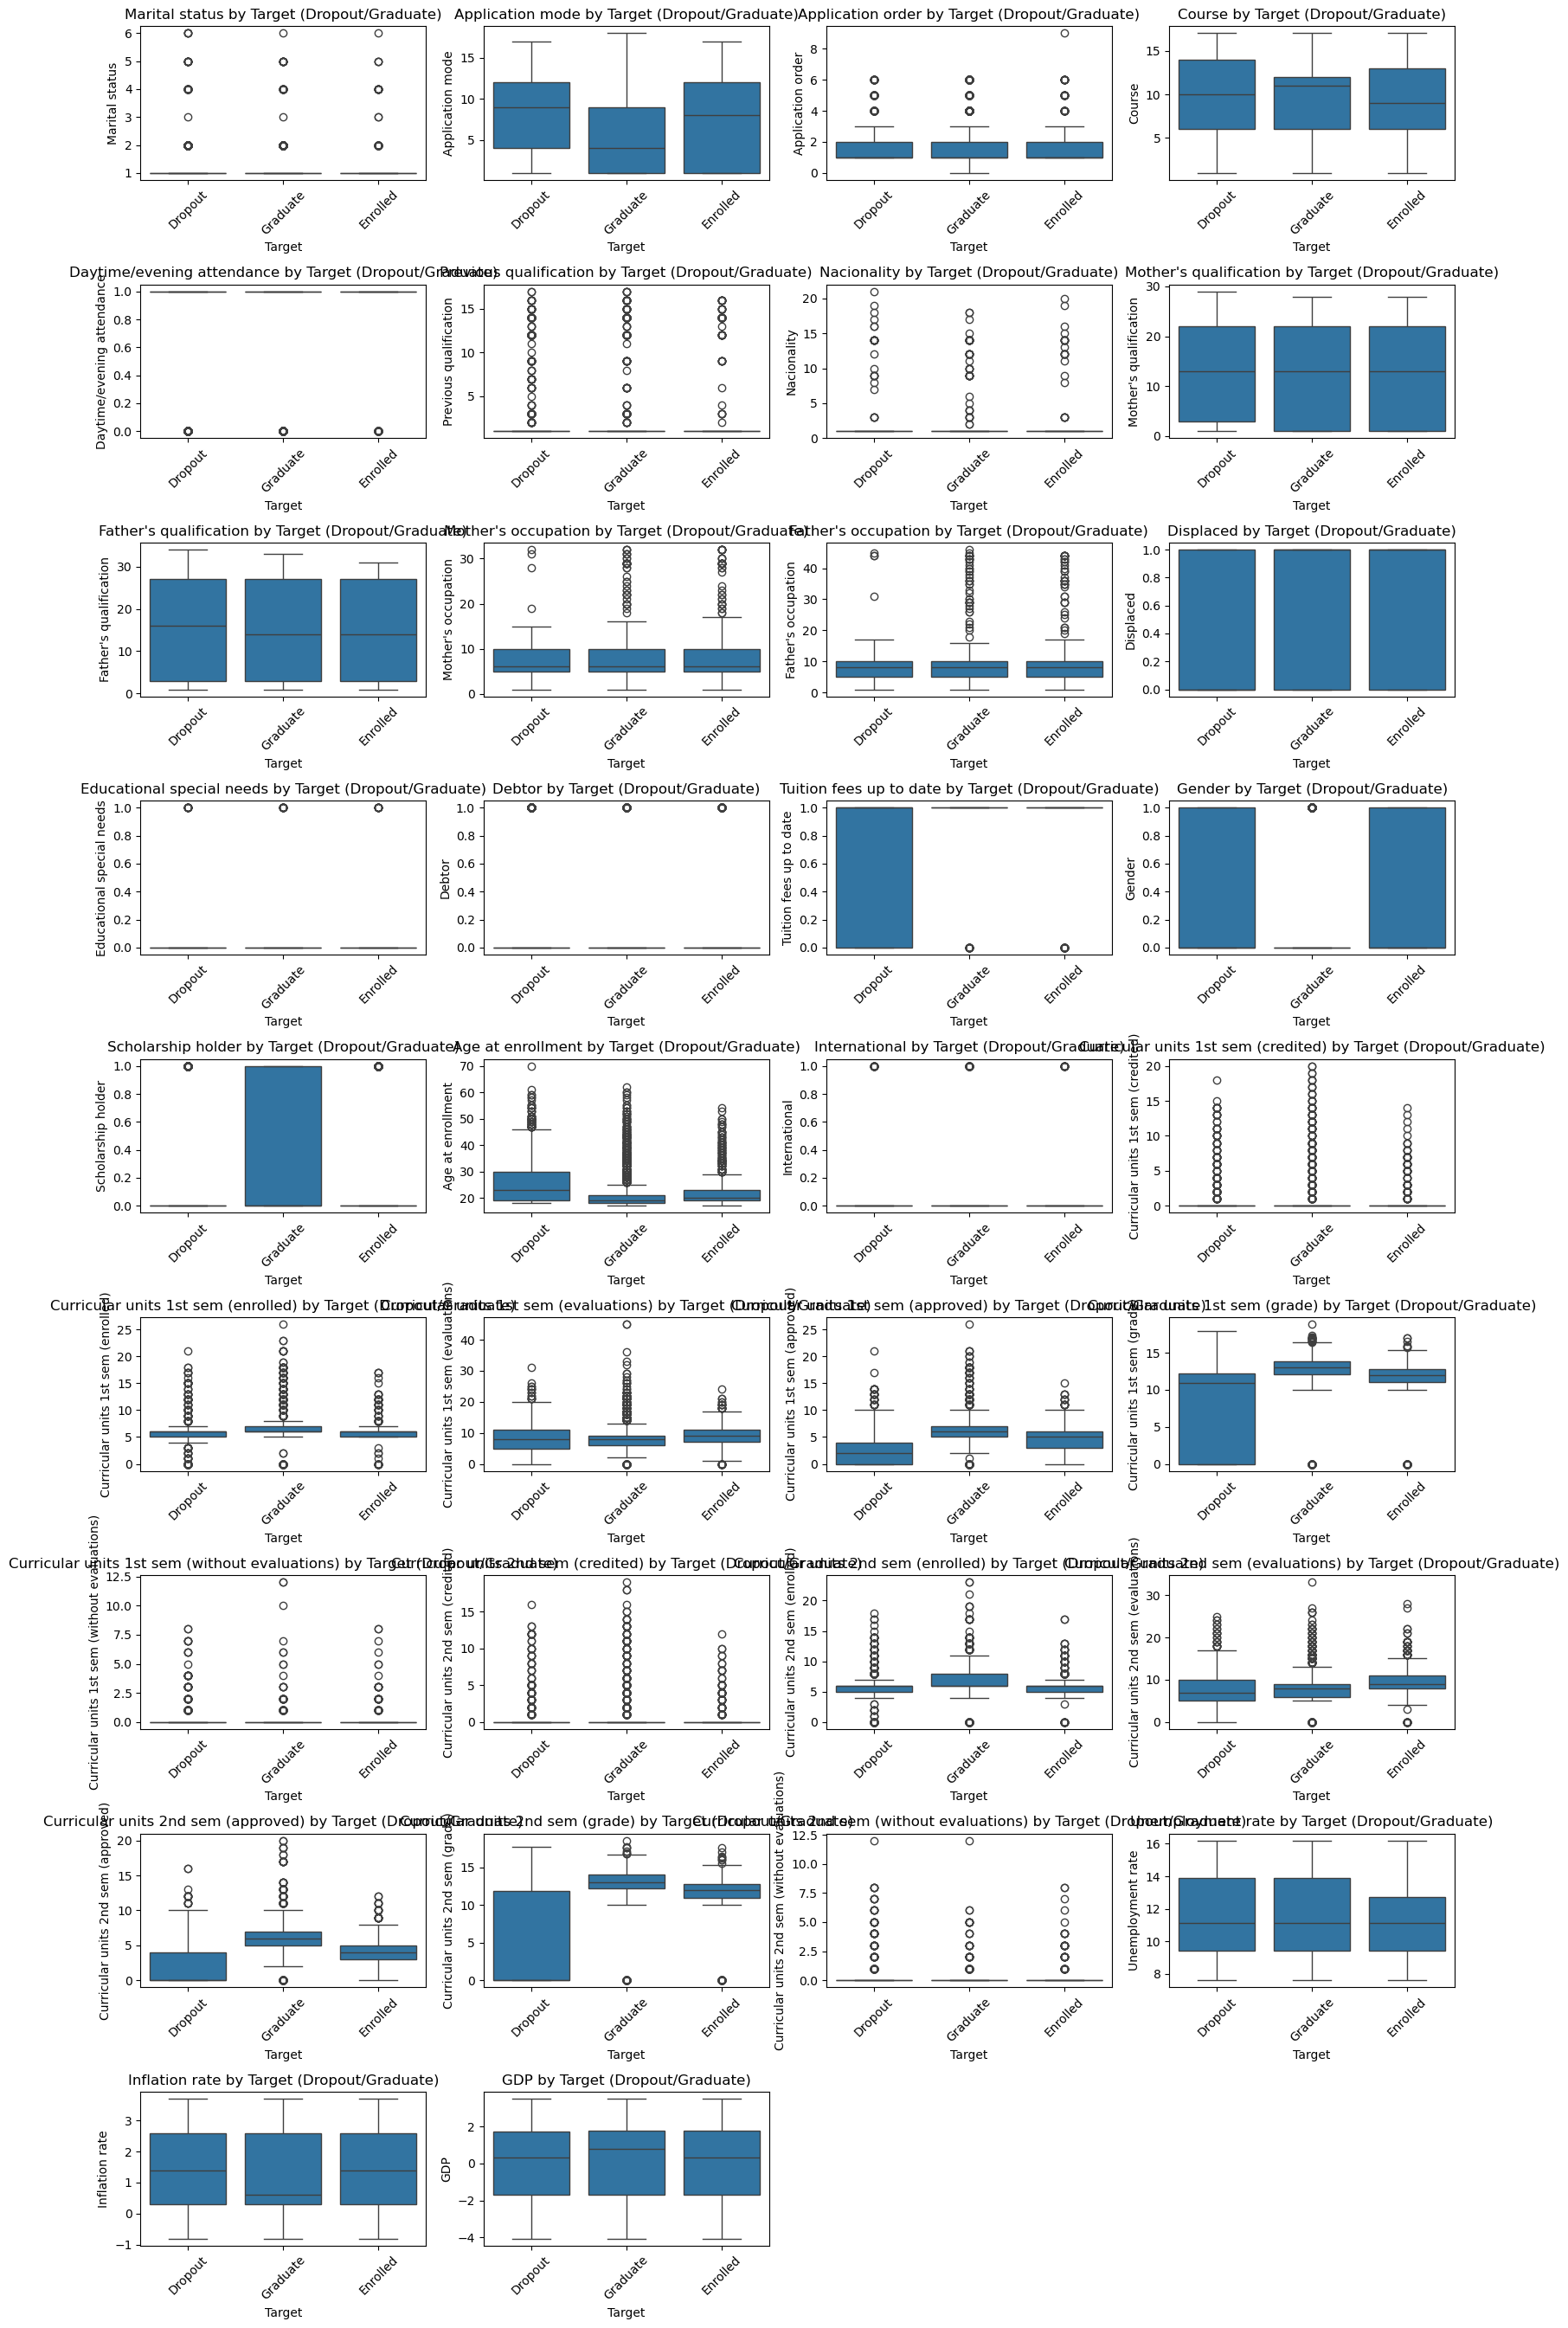

In [20]:
plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=data, x='Target', y=column)
    plt.title(f"{column} by Target (Dropout/Graduate)")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## We can now look at the correlation matrix, this will allow us to get a better feel for how certain features affect others

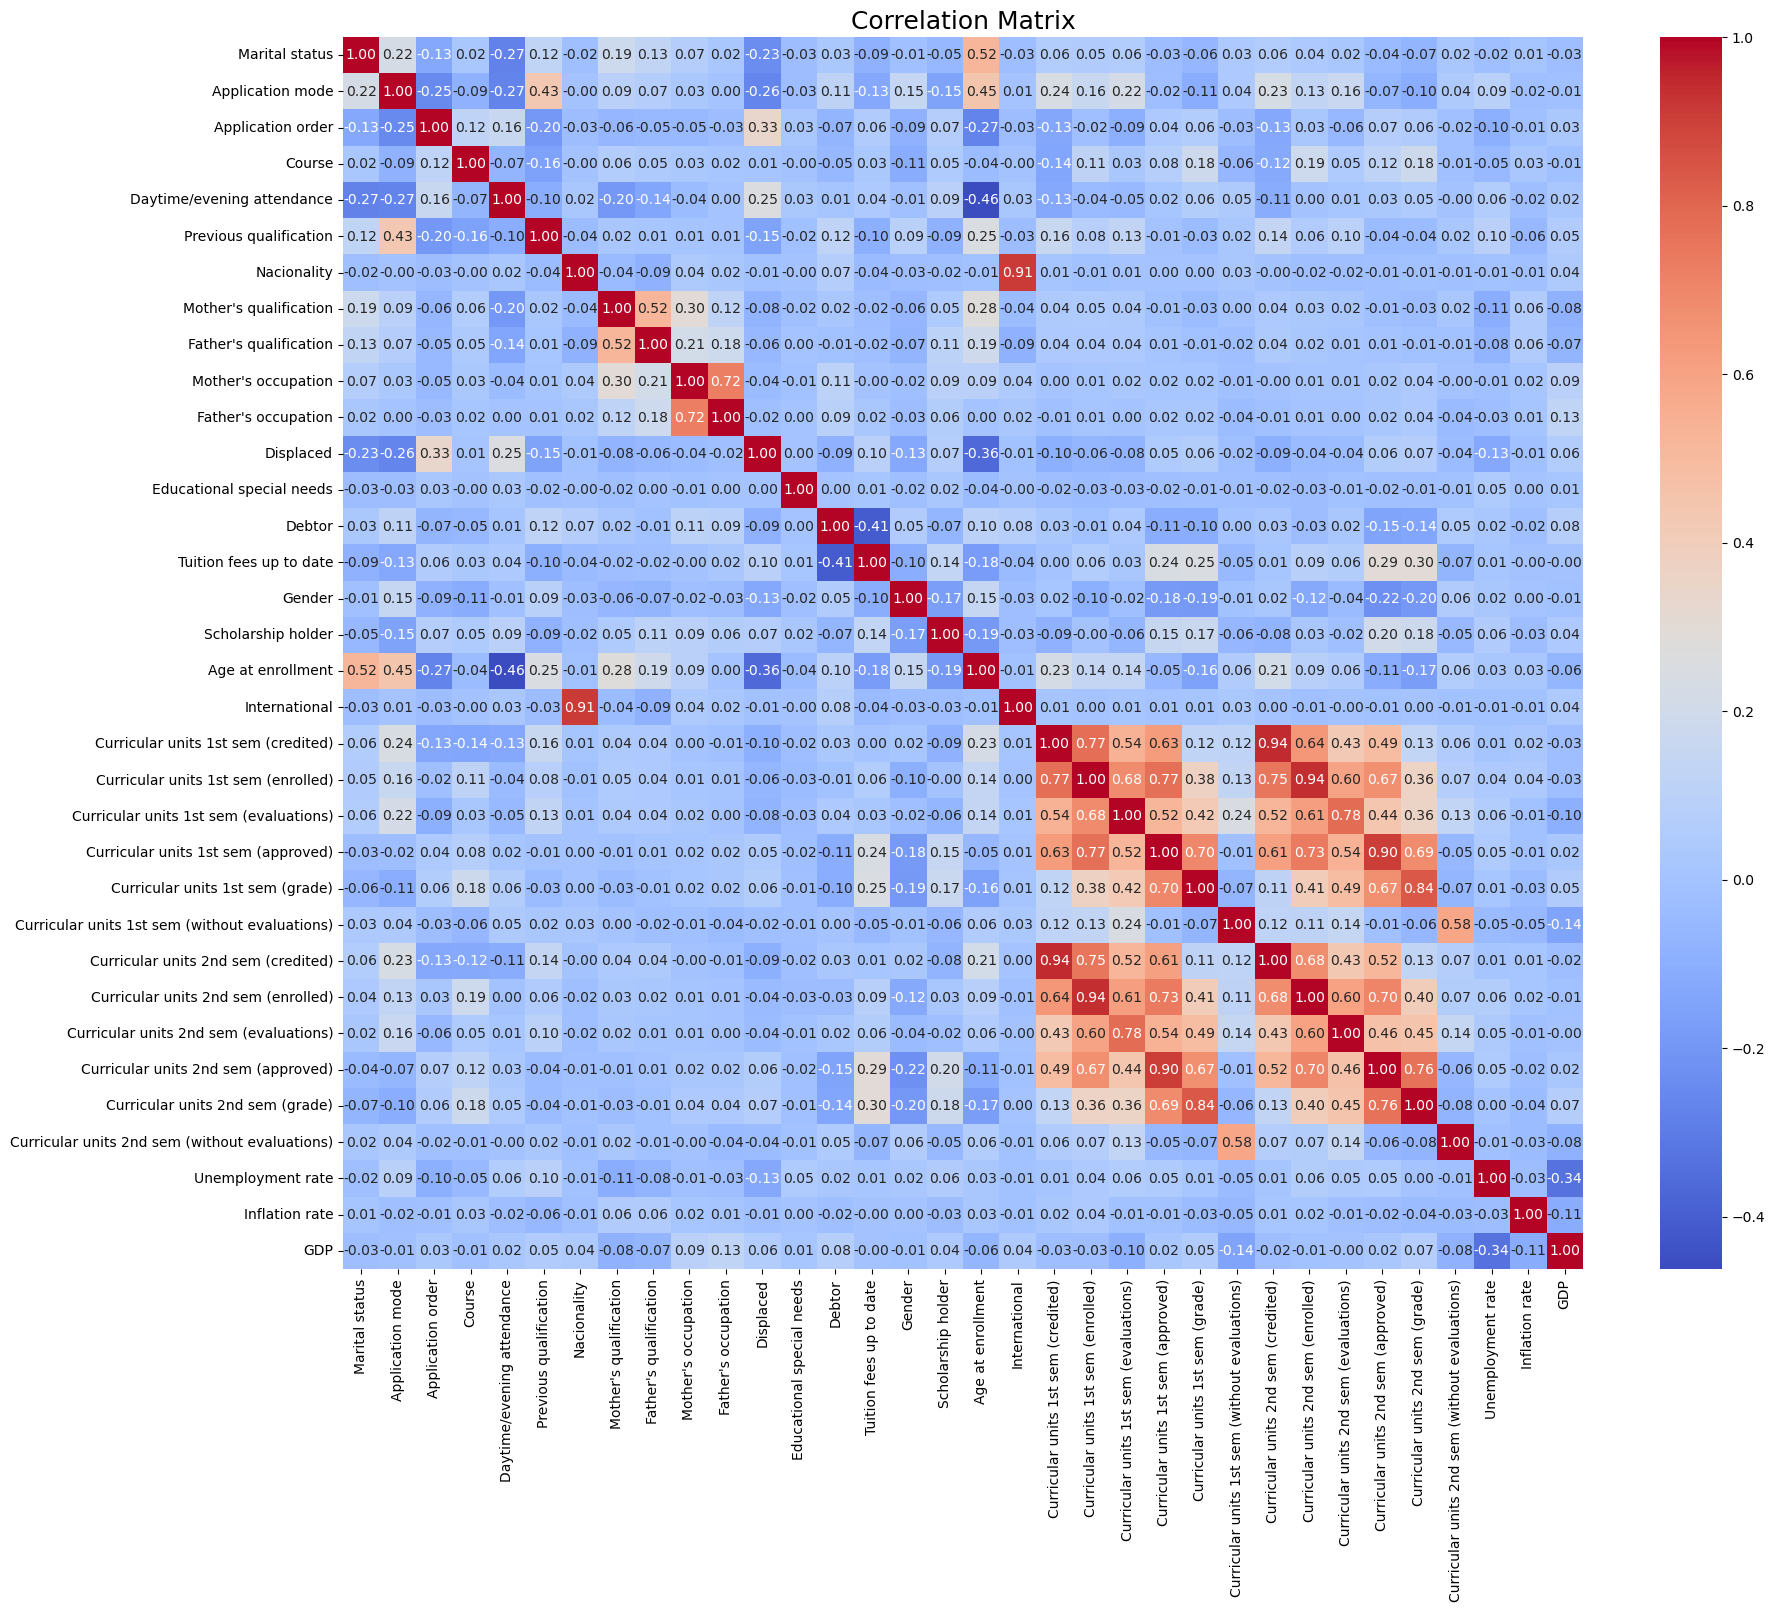

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 16))  

sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", 
            annot_kws={"size": 10})  
plt.title("Correlation Matrix", fontsize=18)  
plt.show()


## We will also consider a scatter plot matrix to visualize each datapoint and feature compared to each datapoint and feature

<Figure size 1200x1000 with 0 Axes>

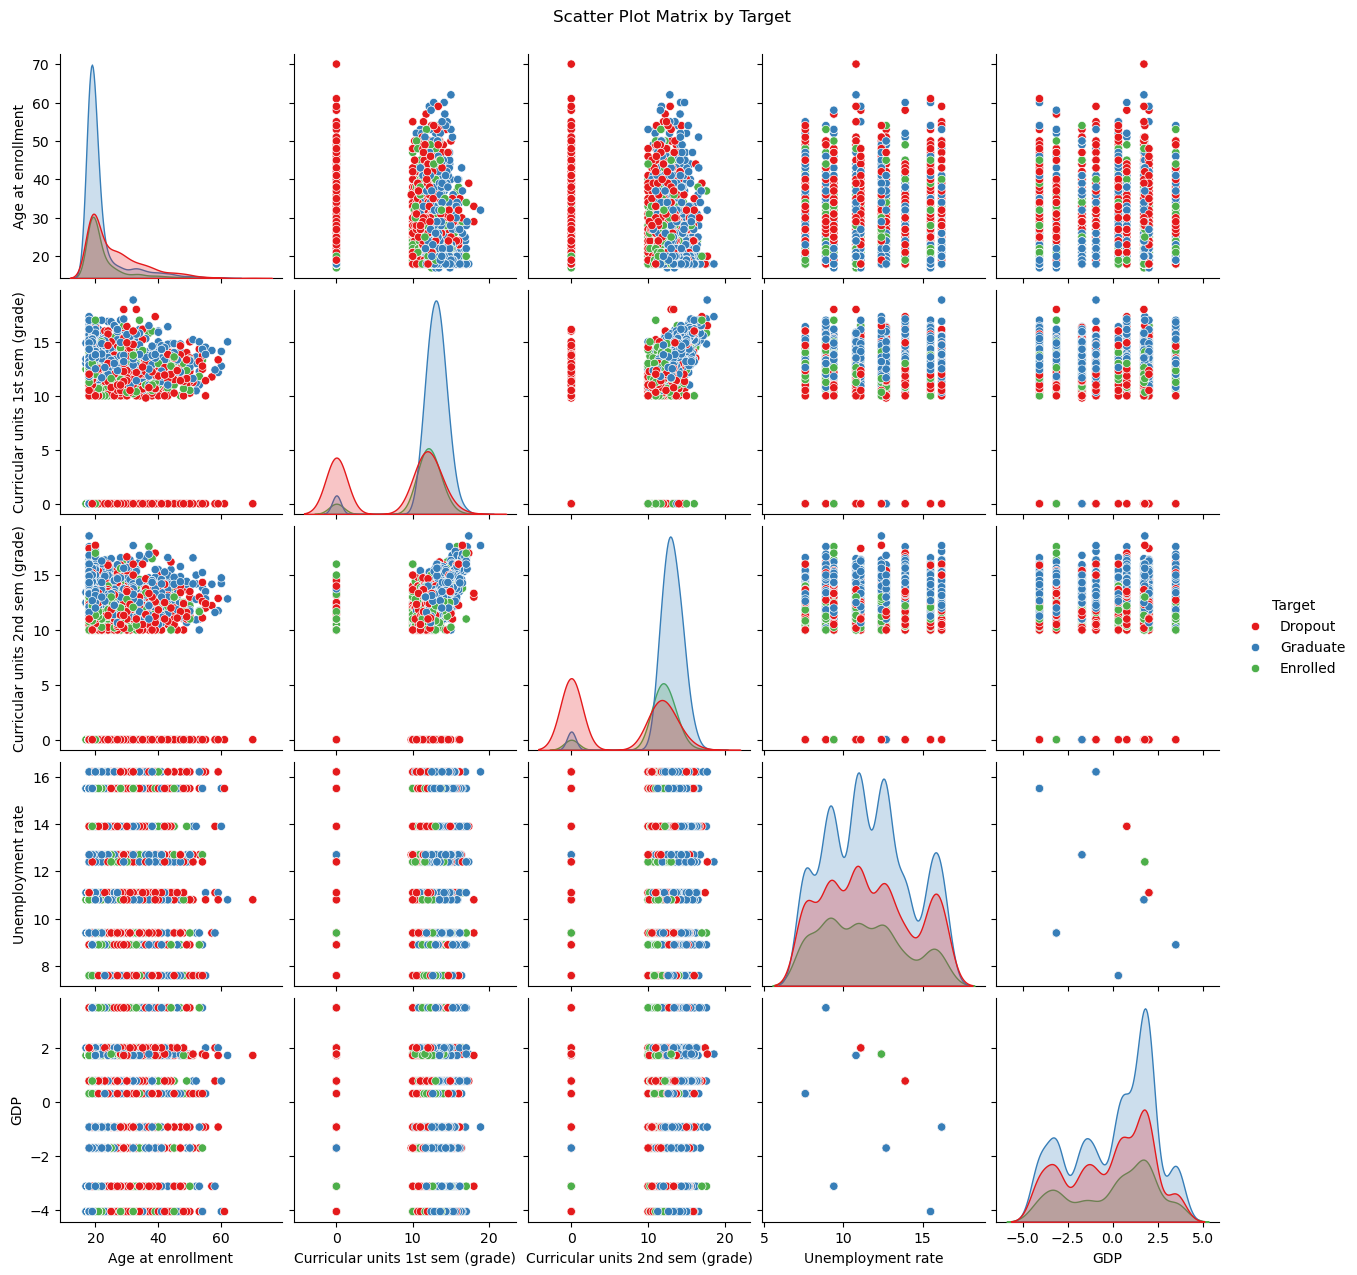

In [22]:
subset_columns = ['Age at enrollment', 'Curricular units 1st sem (grade)', 
                  'Curricular units 2nd sem (grade)', 'Unemployment rate', 'GDP']
plt.figure(figsize=(12, 10))
sns.pairplot(data, vars=subset_columns, hue="Target", palette="Set1")
plt.suptitle("Scatter Plot Matrix by Target", y=1.02)
plt.show()

## We will now train a random forest classifier. Description of each step is in the code

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib  # For saving and loading the model

# encode the target variable ('Graduate' or 'Dropout') to binary values
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])  # 1 for Graduate and 0 for Dropout

# select features and target
X = data.drop(columns=['Target'])  # Features
y = data['Target']                # Target 

# encode categorical features if we have any 
X = pd.get_dummies(X, drop_first=True)

# split the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# make predictions
y_pred = rf_classifier.predict(X_test)

# evaluate our model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the trained model
joblib.dump(rf_classifier, 'random_forest_model.joblib')


Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.84      0.77      0.80       316
    Enrolled       0.54      0.32      0.41       151
    Graduate       0.77      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885



['random_forest_model.joblib']

### We will now visualize our trees

In [ ]:
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the saved model
rf_classifier = joblib.load('random_forest_model.joblib')

def visualize_random_forest(model, max_trees=5):
    n_trees = min(len(model.estimators_), max_trees)
    fig, axes = plt.subplots(nrows=1, ncols=n_trees, figsize=(15, 5), dpi=100)

    for i in range(n_trees):
        plot_tree(model.estimators_[i], filled=True, ax=axes[i])
        axes[i].set_title(f'Tree {i + 1}')

    plt.tight_layout()
    plt.show()

visualize_random_forest(rf_classifier)


In [ ]:
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the saved model
rf_classifier = joblib.load('random_forest_model.joblib')

# Visualize only the first tree in the random forest
plt.figure(figsize=(20, 10))  # Adjust the figure size for better visibility
plot_tree(rf_classifier.estimators_[0], filled=True)
plt.title("Tree 1 of Random Forest")
plt.show()


### We will now show the importance of the features we used

In [ ]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd

# Load the saved model
rf_classifier = joblib.load('random_forest_model.joblib')

# Get feature importances from the model
feature_importances = rf_classifier.feature_importances_
features = X.columns  # Assuming `X` is the same DataFrame used for training

# Create a DF for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


### We will now run PCA on our data which could potentially help us down the line to get better performace from our models

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data if it's not already standardized (PCA performs better on standardized data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.dropna())  # Drop rows with missing values if needed

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(data_scaled)

# Convert to DataFrame for easy plotting
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()